<a href="https://colab.research.google.com/github/azriawi/Artificial-Intelligence-Project/blob/main/ETH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving ETH-USD.csv to ETH-USD.csv


In [ ]:
#Store the data into a data frame 
df = pd.read_csv('ETH-USD.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/5/2020,188.632187,191.362335,180.718338,185.912842,185.912842,20054601647
1,12/5/2020,185.877335,191.601349,185.701797,189.312500,189.312500,15899726284
2,13/5/2020,189.374100,200.197327,189.127701,199.193283,199.193283,17054662289
3,14/5/2020,198.891510,204.117599,196.868820,202.949097,202.949097,20150524861
4,15/5/2020,202.955399,203.566391,193.755676,195.622665,195.622665,16602342092
5,16/5/2020,195.613388,202.771194,194.501587,200.677124,200.677124,15379081645


In [ ]:
#Get the number of trading days
df.shape

(366, 7)

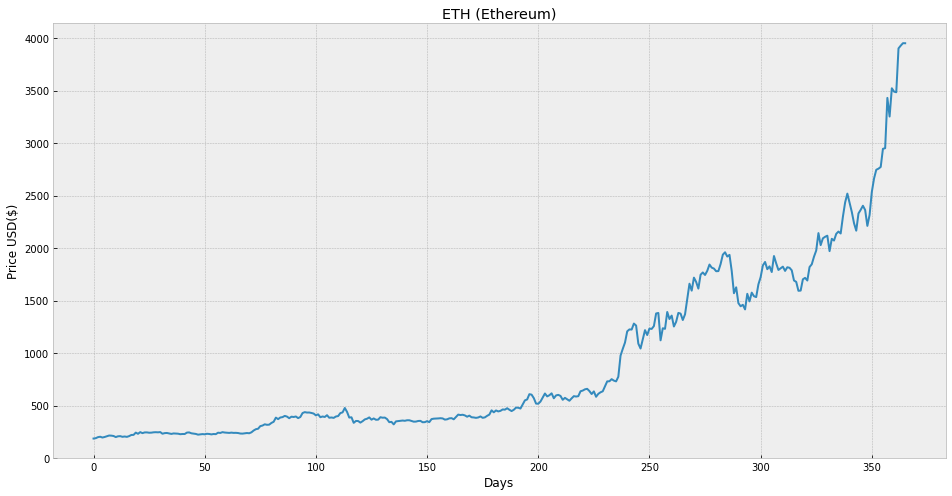

In [ ]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('ETH (Ethereum)')
plt.xlabel('Days')
plt.ylabel('Price USD($)')
plt.plot(df['Close'])
plt.show()

In [ ]:
#Get the close price
df = df[['Close']]
df.head(4)

,Close
0,185.912842
1,189.312500
2,199.193283
3,202.949097


In [ ]:
#Create a variable to predict 'x' days out into the future
future_days = 25
#Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
362,3902.647705,NaN
363,3928.844727,NaN
364,3952.293945,NaN
365,3951.769043,NaN


In [ ]:
#Create the feature data set (X) and convert it to numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 185.912842]
 [ 189.3125  ]
 [ 199.193283]
 [ 202.949097]
 [ 195.622665]
 [ 200.677124]
 [ 207.158691]
 [ 214.525055]
 [ 213.451111]
 [ 210.096741]
 [ 199.883606]
 [ 207.169189]
 [ 208.694397]
 [ 202.370346]
 [ 205.319748]
 [ 201.902313]
 [ 208.863434]
 [ 219.840424]
 [ 220.675125]
 [ 242.345596]
 [ 230.975708]
 [ 246.99176 ]
 [ 237.219055]
 [ 244.179321]
 [ 244.426392]
 [ 241.221985]
 [ 241.93132 ]
 [ 245.167252]
 [ 246.309906]
 [ 244.911453]
 [ 247.444946]
 [ 231.702667]
 [ 237.49321 ]
 [ 238.908844]
 [ 234.1147  ]
 [ 229.928909]
 [ 234.416168]
 [ 233.028275]
 [ 232.101166]
 [ 227.13829 ]
 [ 229.274261]
 [ 228.989822]
 [ 242.533188]
 [ 244.142151]
 [ 235.772461]
 [ 232.944489]
 [ 229.668045]
 [ 222.959793]
 [ 225.347168]
 [ 228.19487 ]
 [ 226.315002]
 [ 231.113419]
 [ 229.392197]
 [ 225.38707 ]
 [ 229.074112]
 [ 227.664597]
 [ 241.510223]
 [ 239.075531]
 [ 246.670013]
 [ 243.015961]
 [ 240.984985]
 [ 239.458176]
 [ 242.131699]
 [ 239.604584]
 [ 240.211487]
 [ 238.423523]
 [ 233.640

In [ ]:
#Create the target data set (y) and convert it to numpy array and get all of the target values except the last 'x' days/rows
y = np.array(df['Prediction'][:-future_days])
print(y)

[ 241.221985  241.93132   245.167252  246.309906  244.911453  247.444946
  231.702667  237.49321   238.908844  234.1147    229.928909  234.416168
  233.028275  232.101166  227.13829   229.274261  228.989822  242.533188
  244.142151  235.772461  232.944489  229.668045  222.959793  225.347168
  228.19487   226.315002  231.113419  229.392197  225.38707   229.074112
  227.664597  241.510223  239.075531  246.670013  243.015961  240.984985
  239.458176  242.131699  239.604584  240.211487  238.423523  233.640884
  232.773087  235.48381   238.487518  236.153168  245.016724  262.190643
  274.689056  279.215424  304.056763  309.643616  321.514099  316.657257
  318.190887  334.586639  345.554657  385.199707  370.671722  386.295166
  389.875488  401.590576  394.961945  379.512848  393.987366  391.120453
  395.887573  380.384064  391.02417   428.741791  437.397827  433.354919
  433.786621  429.53125   423.669312  406.463776  416.439789  389.126343
  395.835144  391.384491  408.144196  384.001038  3

In [ ]:
#Split the data into 75% training and 25% testing 
x_train, x_test, y_train,y_test= train_test_split(X,y,test_size = 0.25)

In [ ]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train,y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
#Get the last 'x' rows of the feature dataset
x_future = df.drop(['Prediction'], 1)[-future_days:]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future 

array([[2344.89502 ],
       [2237.136963],
       [2166.188721],
       [2330.210938],
       [2364.751709],
       [2403.535156],
       [2363.586182],
       [2211.625732],
       [2316.05957 ],
       [2534.481689],
       [2662.865234],
       [2746.380127],
       [2756.876953],
       [2773.207031],
       [2945.892822],
       [2952.056152],
       [3431.086182],
       [3253.629395],
       [3522.783203],
       [3490.880371],
       [3484.729004],
       [3902.647705],
       [3928.844727],
       [3952.293945],
       [3951.769043]])

In [ ]:
#Show model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[3902.647705 3902.647705 3490.880371 3902.647705 3902.647705 3951.769043
 3902.647705 3490.880371 3902.647705 3952.293945 3952.293945 3952.293945
 3952.293945 3952.293945 3952.293945 3952.293945 3952.293945 3952.293945
 3952.293945 3952.293945 3952.293945 3952.293945 3952.293945 3952.293945
 3952.293945]

[2982.9295834  2844.79158681 2753.8410975  2964.1056576  3008.3844154
 3058.10197544 3006.8902945  2812.08804297 2945.96463243 3225.96591279
 3390.54428581 3497.60430828 3511.06047624 3531.99444927 3753.36508152
 3761.2660226  4375.34770235 4147.86100001 4492.89661819 4451.99950645
 4444.11390108 4979.85529898 5013.43797703 5043.49817008 5042.82528387]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


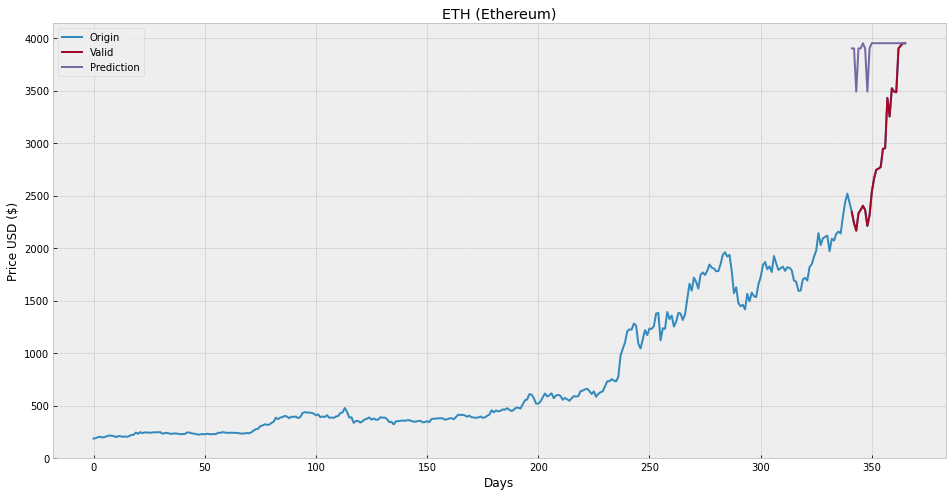

In [ ]:
#Visualize the data
prediction = tree_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = prediction
plt.figure(figsize=(16,8))
plt.title('ETH (Ethereum)')
plt.xlabel('Days')
plt.ylabel('Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Origin', 'Valid', 'Prediction'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


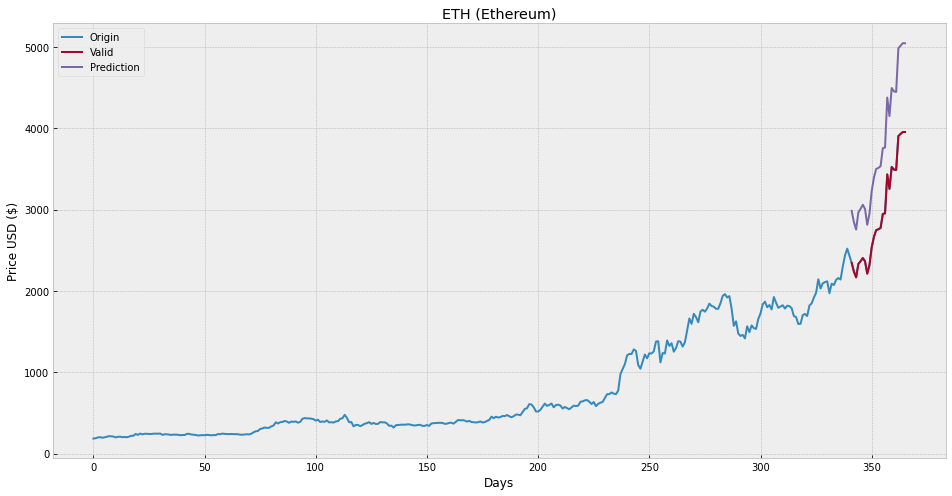

In [ ]:
#Visualize the data
prediction = lr_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = prediction
plt.figure(figsize=(16,8))
plt.title('ETH (Ethereum)')
plt.xlabel('Days')
plt.ylabel('Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Origin', 'Valid', 'Prediction'])
plt.show()